# Setup

In [20]:
!pip install fastai==1.0.61 torch==1.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import warnings
warnings.filterwarnings('ignore')

# Processing training data

In [22]:
from os import listdir

def remove_invalid(df):
    file_names = listdir('data/images')
    return df[df['image_id'].isin(file_names)]

In [23]:
from fastai.vision import *
import pandas as pd

train_df = pd.read_csv('data/train.csv')
train_df = remove_invalid(train_df)

tfms = get_transforms() # todo experiment with transformations
train = ImageDataBunch.from_df(path='data/images', df=train_df, valid_pct=0.2, label_delim=' ', size=224, ds_tfms=tfms).normalize(imagenet_stats)

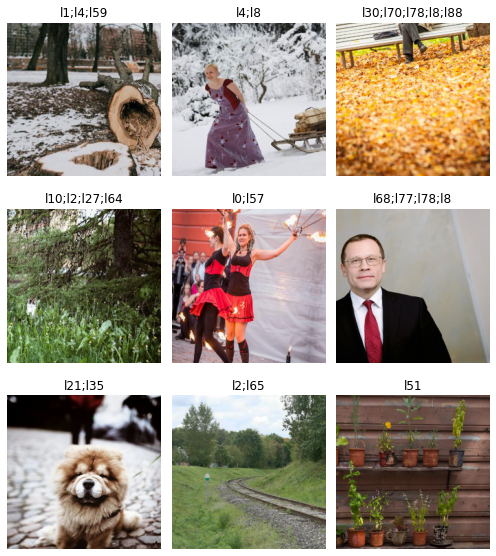

In [24]:
train.show_batch(rows=3, figsize=(7,8))

# The good stuff

In [ ]:
from fastai.layers import BCEWithLogitsFlat
from fastai.callback import * 
learn = cnn_learner(train, models.resnet34, metrics=accuracy, loss_func=BCEWithLogitsFlat()) # todo experiment with different models
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,accuracy,time
0,1.068383,1.670287,0.000000,00:55
1,1.054405,1.334042,0.000000,00:54
2,1.054009,1.138318,0.000000,00:56
3,1.052719,1.022699,0.000000,00:54
4,1.051025,0.958058,0.000000,01:04
5,1.047697,0.914919,0.000000,00:56
6,1.044766,0.884756,0.000000,00:54
7,1.041676,0.860741,0.000000,00:55
8,1.036540,0.848355,0.000000,00:54
9,1.031101,0.834235,0.000000,00:53


In [26]:
test_df = pd.read_csv('data/test.csv')
print(test_df)

      image_id
0   img102.jpg
1   img103.jpg
2    img11.jpg
3   img113.jpg
4   img114.jpg
..         ...
83   img81.jpg
84   img84.jpg
85   img90.jpg
86   img93.jpg
87   img94.jpg

[88 rows x 1 columns]


image_id    img102.jpg
Name: 0, dtype: object


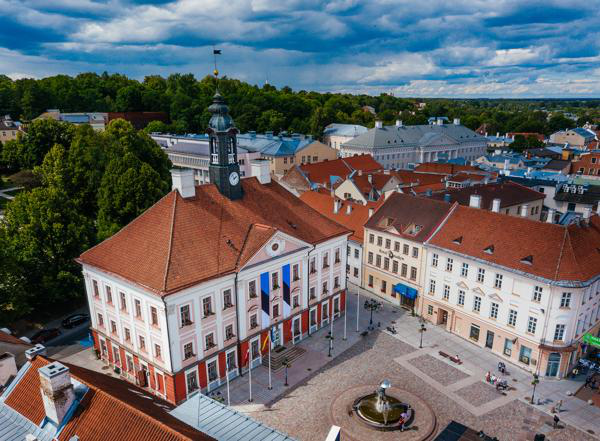

In [27]:
img = test_df.sample().iloc[0]
print(img)

img = open_image('data/images/' + img['image_id'])
img

In [28]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

['l0',
 'l1',
 'l24',
 'l26',
 'l28',
 'l39',
 'l40',
 'l41',
 'l42',
 'l48',
 'l5',
 'l54',
 'l63',
 'l64',
 'l75',
 'l81',
 'l90']

In [29]:
file_names = listdir('data/images')
for i in test_df.index:
  if test_df.at[i, 'image_id'] in file_names:
    img = open_image('data/images/' + test_df.at[i, 'image_id'])
    print(img)
    pred_class,pred_idx,outputs = learn.predict(img)
    print(pred_class.obj)
    test_df.at[i, 'labels'] = ' '.join(pred_class.obj)
  else:
    test_df.at[i, 'labels'] = ''
print(test_df)

Image (3, 441, 600)
['l0', 'l1', 'l24', 'l26', 'l28', 'l39', 'l40', 'l41', 'l42', 'l48', 'l5', 'l54', 'l63', 'l64', 'l75', 'l81', 'l90']
Image (3, 400, 600)
['l1', 'l10', 'l18', 'l2', 'l22', 'l3', 'l5', 'l63', 'l65', 'l7', 'l70', 'l71', 'l80', 'l81', 'l89', 'l91']
Image (3, 400, 600)
['l0', 'l1', 'l11', 'l14', 'l17', 'l25', 'l4', 'l40', 'l44', 'l46', 'l5', 'l51', 'l69', 'l72', 'l76', 'l8']
Image (3, 600, 400)
['l1', 'l10', 'l12', 'l18', 'l2', 'l27', 'l28', 'l3', 'l41', 'l64', 'l68', 'l72', 'l77', 'l82', 'l91']
Image (3, 400, 600)
['l10', 'l13', 'l14', 'l16', 'l24', 'l51', 'l64', 'l68', 'l74', 'l77']
Image (3, 450, 600)
['l0', 'l1', 'l12', 'l2', 'l20', 'l22', 'l29', 'l3', 'l31', 'l43', 'l5', 'l56', 'l6']
Image (3, 401, 600)
['l0', 'l1', 'l2', 'l21', 'l28', 'l37', 'l38', 'l39', 'l40', 'l53', 'l54', 'l6', 'l78']
Image (3, 589, 600)
['l15', 'l29', 'l34', 'l35', 'l44', 'l46', 'l53', 'l66', 'l71', 'l8', 'l89', 'l91']
Image (3, 400, 600)
['l23', 'l24', 'l25', 'l26', 'l29', 'l33', 'l35', 'l42'

In [30]:
test_df.to_csv('data/submission.csv' , index = False)

In [ ]:
from google.colab import files

files.upload()

In [ ]:
import json

!mkdir /root/.kaggle/
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

In [31]:
!kaggle competitions submit -c tartu-object-detection-part-2 -f data/submission.csv -m "FastAI submission"

100% 5.46k/5.46k [00:00<00:00, 27.5kB/s]
Successfully submitted to Object recognition for The Image Bank of Tartu (2)